In [2]:
'''importing the required libraries'''

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
#plt.style.use('bmh')

'''Importing the dataset and checking its properties '''
df =  pd.read_csv('major_project_data.csv')

print(len(df))

Using TensorFlow backend.


6362620


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
'''Checking for any null values'''
print('Null Values =',df.isnull().values.any())

Null Values = False


In [8]:
'''removing the unwanted features'''
df.drop('nameOrig', axis=1, inplace=True)
df.drop('nameDest', axis=1, inplace=True)
df.drop('isFlaggedFraud', axis=1, inplace=True)

isFraud
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

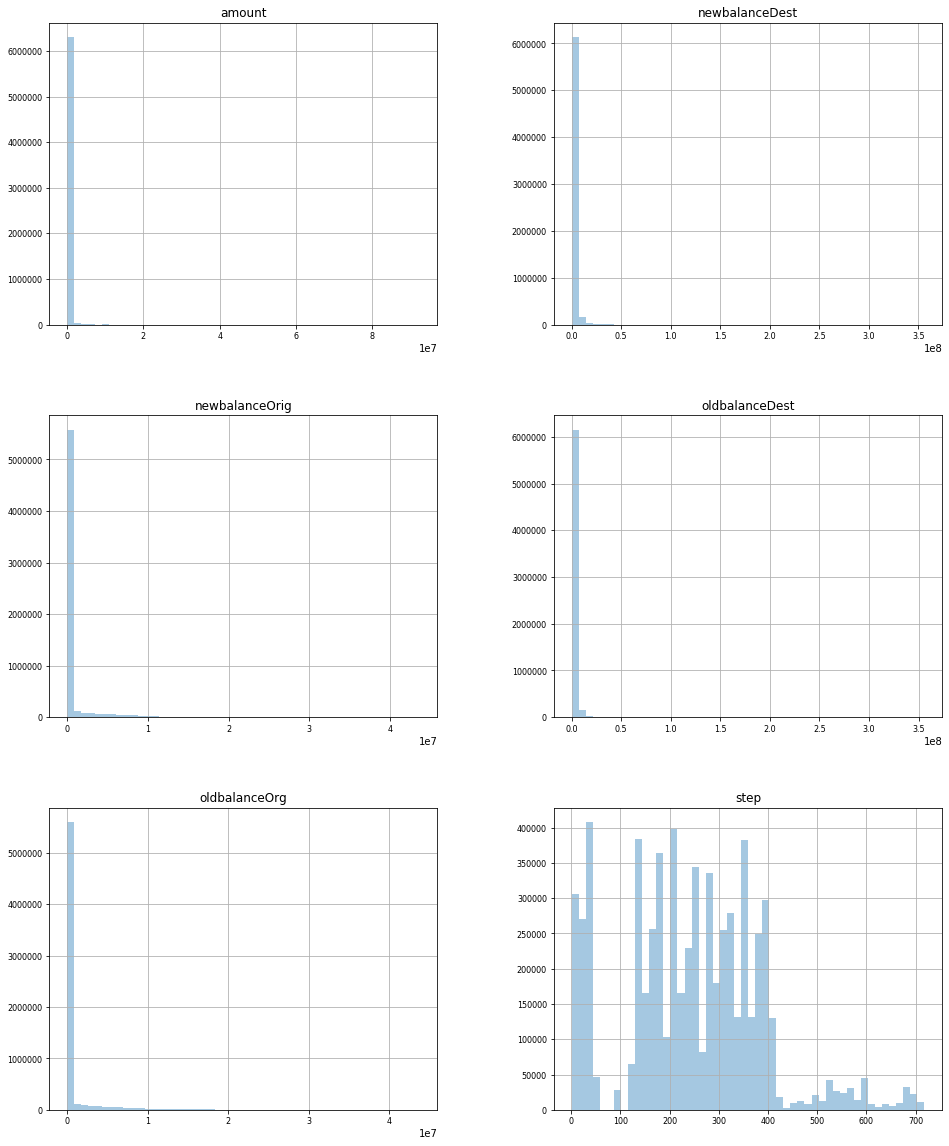

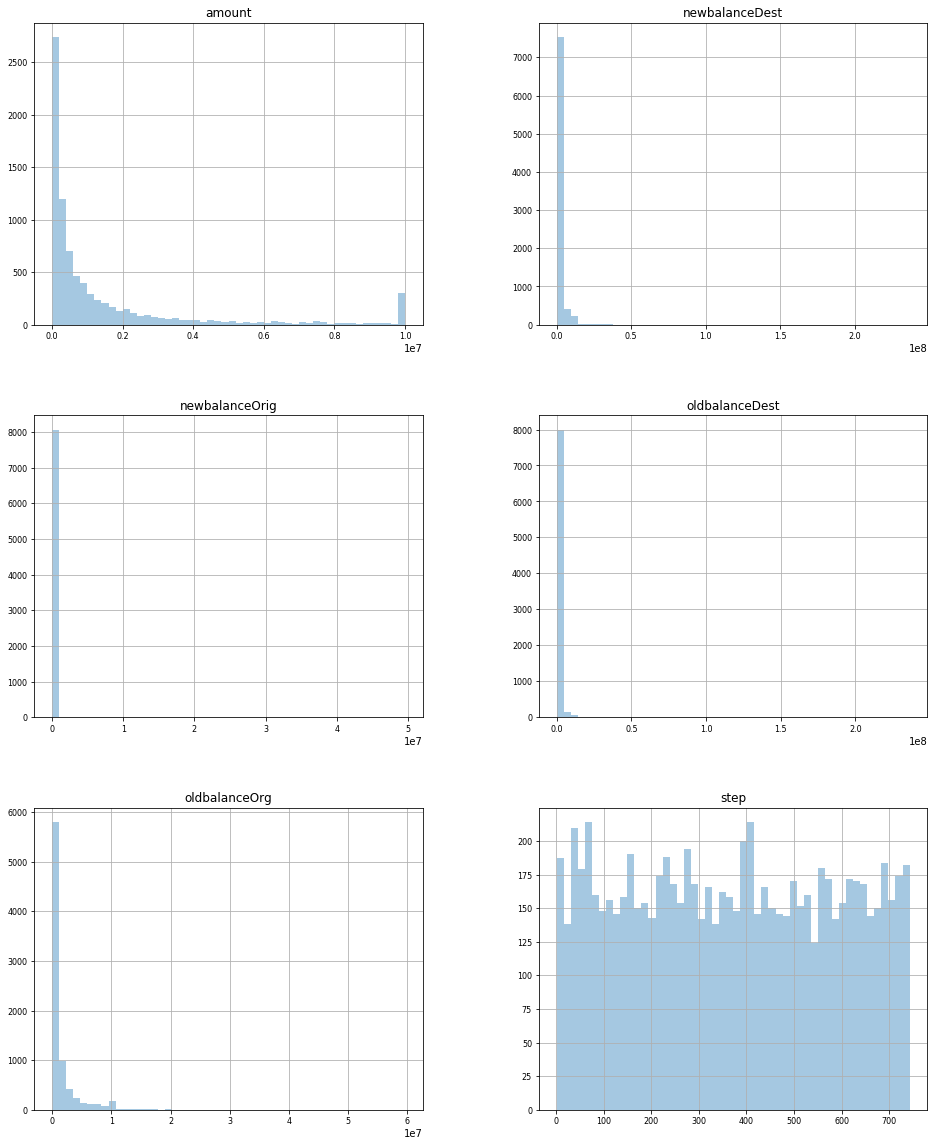

In [9]:
''' Visualising the variables by grouping them by class '''
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

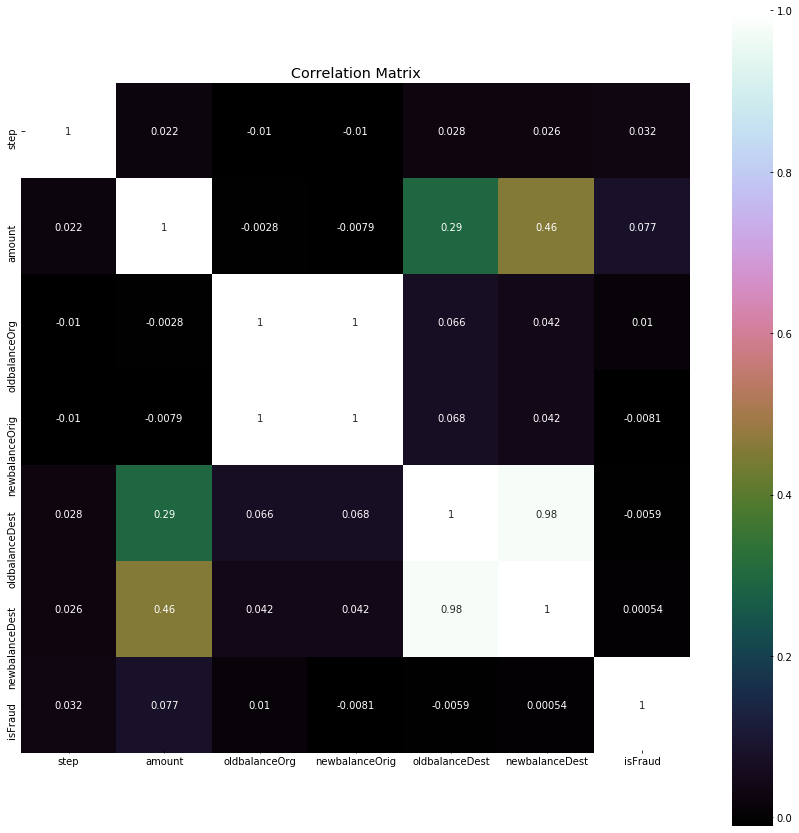

In [6]:
''' co-relation matrix to check multicolinearity between variables '''

correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [10]:
#creating dummy variables for categorical values
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)


0    19974
1       26
Name: isFraud, dtype: int64
Before OverSampling, counts of label '1': 18
Before OverSampling, counts of label '0': 13982 

After OverSampling, the shape of train_X: (27964, 11)
After OverSampling, the shape of train_y: (27964,) 

After OverSampling, counts of label '1': 13982
After OverSampling, counts of label '0': 13982


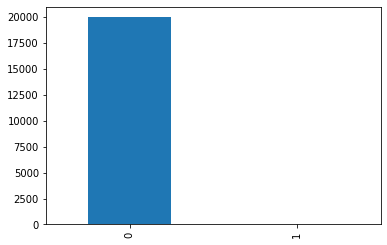

In [12]:
'''checking if target class is balanced or not'''

df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())

'''Splitting the data into training and test'''

X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

'''resampling the training data'''

sm = SMOTE(random_state=10)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


In [13]:
''' Feature scaling '''

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
27964/27964 [==============================] - 2s 70us/step - loss: 0.1961 - accuracy: 0.9279
Epoch 2/10
27964/27964 [==============================] - 2s 66us/step - loss: 0.0850 - accuracy: 0.9606
Epoch 3/10
27964/27964 [==============================] - 2s 71us/step - loss: 0.0686 - accuracy: 0.9693
Epoch 4/10
27964/27964 [==============================] - 2s 70us/step - loss: 0.0582 - accuracy: 0.9755
Epoch 5/10
27964/27964 [==============================] - 2s 68us/step - loss: 0.0511 - accuracy: 0.9805
Epoch 6/10
27964/27964 [==============================] - 2s 67us/step - loss: 0.0447 - accuracy: 0.9840
Epoch 7/10
27964/27964 [==============================] - 2s 65us/step - loss: 0.0399 - accuracy: 0.9869
Epoch 8/10
27964/27964 [==============================] - 2s 69us/step - loss: 0.0364 - accuracy: 0.9884
Epoch 9/10
27964/27964 [==============================] - 2s 68us

KeyError: 'acc'

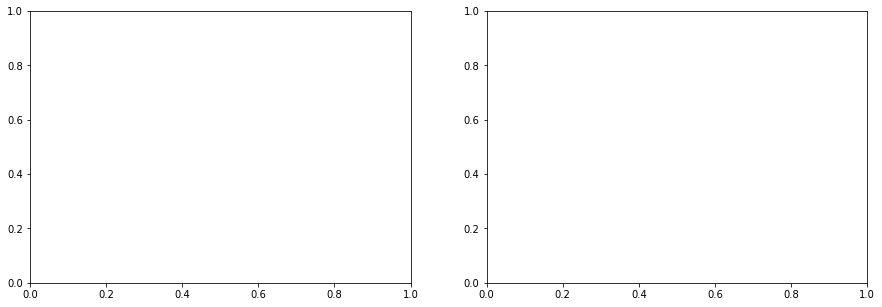

In [14]:
''' Initializing the model '''

model = Sequential()

''' Adding the input layer and the first hidden layer '''

model.add(Dense(input_dim=11, output_dim = 6, init = 'uniform', activation = 'relu'))

''' Adding the second hidden layer '''

model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

''' Adding the output layer '''

model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

''' Compiling and fitting the model '''

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, nb_epoch = 10)

''' Plotting the training curves '''

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    ''' History for accuracy'''
    
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train'], loc='best')
    
    ''' History for loss'''
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['loss'], loc='best')
    plt.show()
    
plot_model_history(model_info)

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [15]:
''' Predicting the test results and '''

y_pred = model.predict_classes(x_test_scaled)
acc = accuracy_score(y_test,y_pred)*100
print('Accuracy:',round(acc,2))

''' Generating the Confusion matrix and Classification report'''

print('Confusion matrix', '\n', confusion_matrix(y_test, y_pred), '\n')
print('Classification report', '\n', classification_report(y_test, y_pred), '\n')

Accuracy: 98.28
Confusion matrix 
 [[5893   99]
 [   4    4]] 

Classification report 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5992
           1       0.04      0.50      0.07         8

    accuracy                           0.98      6000
   macro avg       0.52      0.74      0.53      6000
weighted avg       1.00      0.98      0.99      6000
 

